<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


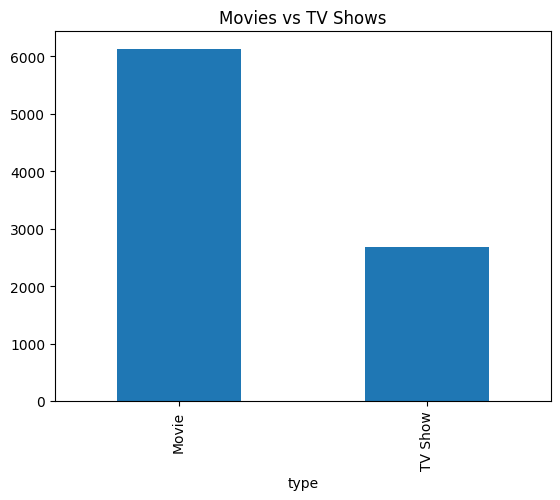

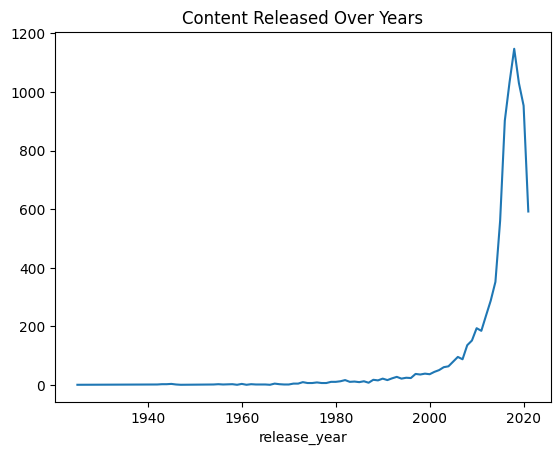

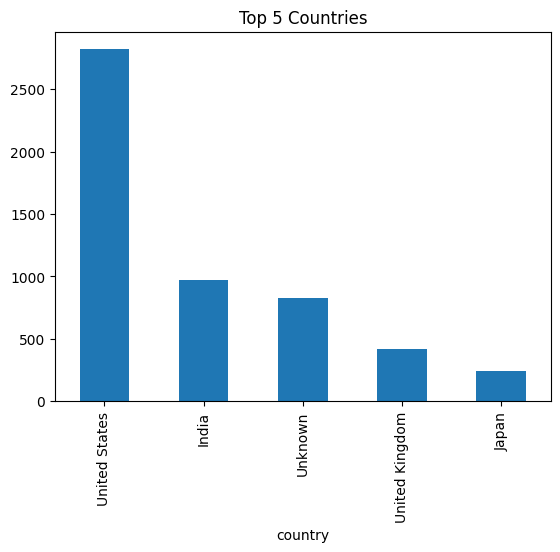

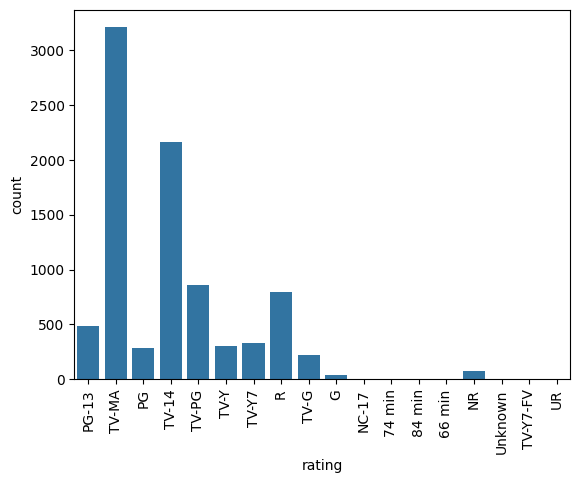

In [3]:
# Load Dataset
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Data Analytics/Datasets/netflix_titles.csv')

# Explore Dataset
df.head()
df.info()
df.describe(include='all')
df.isnull().sum()

# Handle Missing Values
df['director'] = df['director'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Unknown')
df['date_added'] = df['date_added'].str.strip()
df['added_year'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce').dt.year
# Clean Data
df = df.drop_duplicates()
# Convert movie duration to numeric
movies = df[df['type'] == 'Movie'].copy()
movies['duration_num'] = (
    movies['duration']
    .str.replace(' min', '', regex=False)
    .astype(float)
)
# Analyze Key Insights
# Total Movies vs TV Shows
df['type'].value_counts()
# Content released per year
df['release_year'].value_counts().sort_index()
# Content added per year
df['added_year'].value_counts().sort_index()
# Top 5 countries
df['country'].value_counts().head(5)
# Longest movie
movies.loc[movies['duration_num'].idxmax()]
# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# Movies vs TV Shows
df['type'].value_counts().plot(kind='bar')
plt.title('Movies vs TV Shows')
plt.show()
# Content Released per Year
df['release_year'].value_counts().sort_index().plot(kind='line')
plt.title('Content Released Over Years')
plt.show()
# Top 5 Countries
df['country'].value_counts().head(5).plot(kind='bar')
plt.title('Top 5 Countries')
plt.show()
# Ratings Distribution
sns.countplot(data=df, x='rating')
plt.xticks(rotation=90)
plt.show()

# Netflix has more Movies than TV Shows
# Content addition increased significantly after 2016
# United States has the highest number of titles
# Most content falls under a few popular ratings
# Data required cleaning due to missing values and inconsistent dates